Using the CIFAR-10 dataset, train a Convolutional Neural Network to classify images. The model should have at least 3 convolutional layers and 2 fully connected layers. Evaluate the model's performance on a validation set and report the accuracy. Finally, use the model to classify a few sample images from the test set and report the predictions.
 
 
Upload the code and output screenshots in github and share me the link on or before 16th April. No extensions will be given. Those who submit plagiarised code will not get any marks for the CIA.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers, losses
#from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Parameters
batch_size = 64
num_classes = 10
epochs = 10
learning_rate = 0.01

In [3]:
# Import data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between -1 and 1
train_images = train_images / 255.0 * 2 - 1
test_images = test_images / 255.0 * 2 - 1

In [4]:
# Validation Set
train_images, train_val, train_labels, train_labels_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(120, activation='relu'),
    layers.Dense(84, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [ ]:
model.compile(optimizer = optimizers.Adam(learning_rate=learning_rate),
              loss = losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


model.fit(train_images, train_labels, epochs = epochs, batch_size = batch_size, validation_data=(train_val, train_labels_val))

Epoch 1/10
625/625 [==============================] - 216s 344ms/step - loss: 2.3269 - accuracy: 0.0997 - val_loss: 2.3053 - val_accuracy: 0.0933
Epoch 2/10
625/625 [==============================] - 205s 329ms/step - loss: 2.3037 - accuracy: 0.0994 - val_loss: 2.3054 - val_accuracy: 0.0933
Epoch 3/10
625/625 [==============================] - 213s 340ms/step - loss: 2.3036 - accuracy: 0.1002 - val_loss: 2.3037 - val_accuracy: 0.1017
Epoch 4/10
625/625 [==============================] - 214s 342ms/step - loss: 2.3037 - accuracy: 0.0984 - val_loss: 2.3032 - val_accuracy: 0.0973
Epoch 5/10
625/625 [==============================] - 204s 327ms/step - loss: 2.3038 - accuracy: 0.0975 - val_loss: 2.3028 - val_accuracy: 0.1017
Epoch 6/10
625/625 [==============================] - 212s 339ms/step - loss: 2.3035 - accuracy: 0.1005 - val_loss: 2.3041 - val_accuracy: 0.0979
Epoch 7/10
625/625 [==============================] - 213s 340ms/step - loss: 2.3039 - accuracy: 0.1009 - val_loss: 2.3035 -

In [ ]:
score = model.evaluate(test_images, test_labels, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.303311586380005
Test accuracy: 0.10000000149011612


1/1 [==============================] - 0s 31ms/step


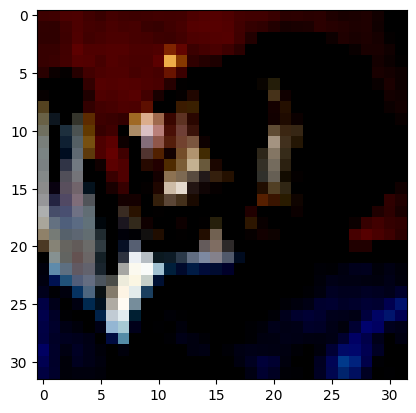

Actual label: [3]
Predicted label: 5





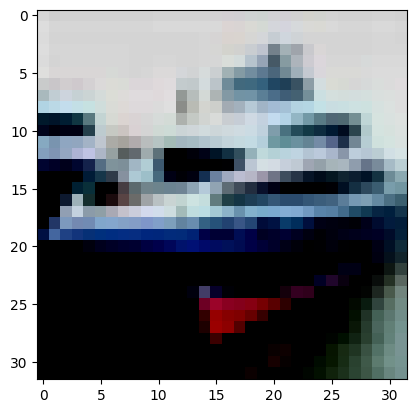

Actual label: [8]
Predicted label: 5





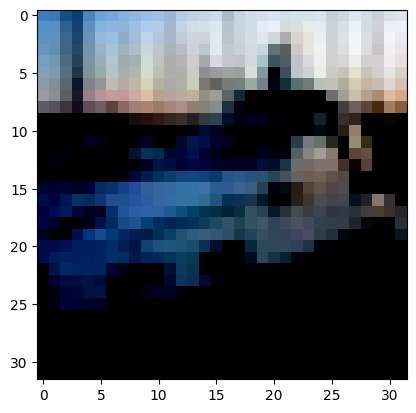

Actual label: [8]
Predicted label: 5





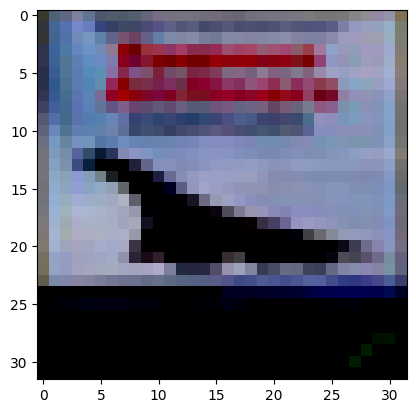

Actual label: [0]
Predicted label: 5





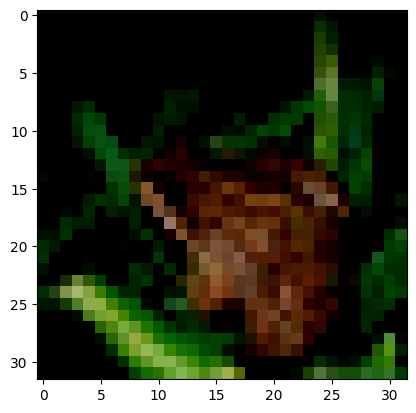

Actual label: [6]
Predicted label: 5





In [ ]:
# Classify a few samples from the set
num_samples = 5
predictions = model.predict(test_images[:num_samples])
predicted_classes = np.argmax(predictions, axis=-1)

for i in range(num_samples):
  # Show image
  plt.imshow(test_images[i])
  plt.show()
  
  print("Actual label:", test_labels[i])
  print("Predicted label:", predicted_classes[i])
  print("\n\n")

In [5]:
test_images[1]

array([[[ 0.84313725,  0.84313725,  0.84313725],
        [ 0.81176471,  0.81176471,  0.81176471],
        [ 0.81960784,  0.81960784,  0.81960784],
        ...,
        [ 0.82745098,  0.82745098,  0.82745098],
        [ 0.82745098,  0.82745098,  0.82745098],
        [ 0.81960784,  0.81960784,  0.81960784]],

       [[ 0.86666667,  0.86666667,  0.86666667],
        [ 0.84313725,  0.84313725,  0.84313725],
        [ 0.84313725,  0.84313725,  0.84313725],
        ...,
        [ 0.85098039,  0.85098039,  0.85098039],
        [ 0.85098039,  0.85098039,  0.85098039],
        [ 0.84313725,  0.84313725,  0.84313725]],

       [[ 0.85882353,  0.85882353,  0.85882353],
        [ 0.83529412,  0.83529412,  0.83529412],
        [ 0.83529412,  0.83529412,  0.83529412],
        ...,
        [ 0.84313725,  0.84313725,  0.84313725],
        [ 0.84313725,  0.84313725,  0.84313725],
        [ 0.83529412,  0.83529412,  0.83529412]],

       ...,

       [[-0.31764706, -0.22352941, -0.30196078],
        [-0

In [ ]:
# Save the model
model.save("CNNModel.h5")

# Load
model = models.load_model("CNNModel.h5")

In [8]:
test_images[:5]

array([[[[ 0.23921569, -0.12156863, -0.61568627],
         [ 0.24705882, -0.12941176, -0.63137255],
         [ 0.29411765, -0.09019608, -0.6       ],
         ...,
         [ 0.0745098 , -0.25490196, -0.71764706],
         [-0.01176471, -0.28627451, -0.71764706],
         [-0.09019608, -0.33333333, -0.74117647]],

        [[ 0.19215686, -0.12156863, -0.6       ],
         [ 0.18431373, -0.1372549 , -0.68627451],
         [ 0.24705882, -0.10588235, -0.64705882],
         ...,
         [ 0.06666667, -0.25490196, -0.75686275],
         [-0.01960784, -0.28627451, -0.74901961],
         [-0.06666667, -0.30980392, -0.73333333]],

        [[ 0.18431373, -0.1372549 , -0.63137255],
         [ 0.18431373, -0.14509804, -0.74117647],
         [ 0.23921569, -0.12941176, -0.71764706],
         ...,
         [ 0.09019608, -0.23137255, -0.73333333],
         [ 0.01960784, -0.25490196, -0.73333333],
         [-0.05882353, -0.30196078, -0.74117647]],

        ...,

        [[-0.46666667, -0.02745098,  0